# ENDEPORTE - Estrategida y Validación Selección de Modelo

In [2]:
!pip install imblearn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\andre\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Métricas y evaluación
from sklearn.model_selection import train_test_split

#Transformaciones en los datos
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option('display.max_colwidth', 128)
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 decimales
pd.set_option('expand_frame_repr', False)


## 1. Carga de los datos

In [4]:
#Cargar los datos despues  

data = pd.read_csv("../stage/clean.csv")


In [5]:
# Verificar si hay NaN en todo el conjunto de datos 'data'
print(data.isnull().sum())

ESTRATO                   6
SEMESTRE                  0
PROMEDIOSEMESTRE          0
EDAD2                     0
CODIGOPROGRAMA            0
GENERO                    0
COD_CIUDADRESIDENCIA    364
COD_CIUDADNACIMIENTO     67
target                    0
dtype: int64


In [6]:
data = data.dropna()
print(data.isnull().sum())

ESTRATO                 0
SEMESTRE                0
PROMEDIOSEMESTRE        0
EDAD2                   0
CODIGOPROGRAMA          0
GENERO                  0
COD_CIUDADRESIDENCIA    0
COD_CIUDADNACIMIENTO    0
target                  0
dtype: int64


In [7]:
data.dtypes

ESTRATO                 float64
SEMESTRE                  int64
PROMEDIOSEMESTRE        float64
EDAD2                     int64
CODIGOPROGRAMA            int64
GENERO                    int64
COD_CIUDADRESIDENCIA    float64
COD_CIUDADNACIMIENTO    float64
target                    int64
dtype: object

## 2. Preparacion y segmentación de los datos

In [8]:
# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns=['target'])  # Excluir la columna target
y = data['target']  # Variable objetivo

# Dividir el conjunto en train + validation (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dividir el conjunto de train en train (80% de train) y validation (20% de train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Confirmar las proporciones
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de validación: {X_val.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 5778
Tamaño del conjunto de validación: 1445
Tamaño del conjunto de prueba: 1806


Creamos y preparamos los sets de datos segun los requerimientos de los dos modelos.

In [9]:
# Crear escalador y SMOTE
scaler = StandardScaler()
smote = SMOTE(random_state=42)

# --- Random Forest (sin escalado, pero con SMOTE) ---
x_rf_train, y_rf_train = smote.fit_resample(X_train, y_train)
x_rf_val, y_rf_val = X_val, y_val  # Sin escalado
x_rf_test, y_rf_test = X_test, y_test  # Sin escalado

# --- Regresión Logística (con escalado y SMOTE) ---
# Escalado en train, validation y test
x_lr_train_scaled = scaler.fit_transform(X_train)
x_lr_val_scaled = scaler.transform(X_val)
x_lr_test_scaled = scaler.transform(X_test)

# Aplicar SMOTE al conjunto de entrenamiento escalado
x_lr_train, y_lr_train = smote.fit_resample(x_lr_train_scaled, y_train)

# Guardar conjuntos de validación y prueba escalados
x_lr_val, y_lr_val = x_lr_val_scaled, y_val
x_lr_test, y_lr_test = x_lr_test_scaled, y_test

# Confirmar distribuciones después de SMOTE
print("Distribución después de SMOTE para Random Forest (Train):")
print(pd.Series(y_rf_train).value_counts(normalize=True) * 100)
print("\nDistribución después de SMOTE para Regresión Logística (Train):")
print(pd.Series(y_lr_train).value_counts(normalize=True) * 100)

print("Conjuntos de datos preparados para Random Forest y Regresión Logística.")


Distribución después de SMOTE para Random Forest (Train):
target
1   50.00
0   50.00
Name: proportion, dtype: float64

Distribución después de SMOTE para Regresión Logística (Train):
target
1   50.00
0   50.00
Name: proportion, dtype: float64
Conjuntos de datos preparados para Random Forest y Regresión Logística.


## 3. Validación de que se mantenga la distrtibución de los datos

In [10]:
# Verificar la distribución de la variable target en el conjunto original
print(data['target'].value_counts(normalize=True))

target
1   0.86
0   0.14
Name: proportion, dtype: float64


In [11]:
# Verificar la distribución en los subconjuntos de entrenamiento, validación y prueba
print('Distribución en el conjunto de entrenamiento (SMOTE aplicado):')
print(y_rf_train.value_counts(normalize=True))

print('Distribución en el conjunto de validación:')
print(y_rf_val.value_counts(normalize=True))

print('Distribución en el conjunto de prueba:')
print(y_rf_test.value_counts(normalize=True))

Distribución en el conjunto de entrenamiento (SMOTE aplicado):
target
1   0.50
0   0.50
Name: proportion, dtype: float64
Distribución en el conjunto de validación:
target
1   0.86
0   0.14
Name: proportion, dtype: float64
Distribución en el conjunto de prueba:
target
1   0.86
0   0.14
Name: proportion, dtype: float64


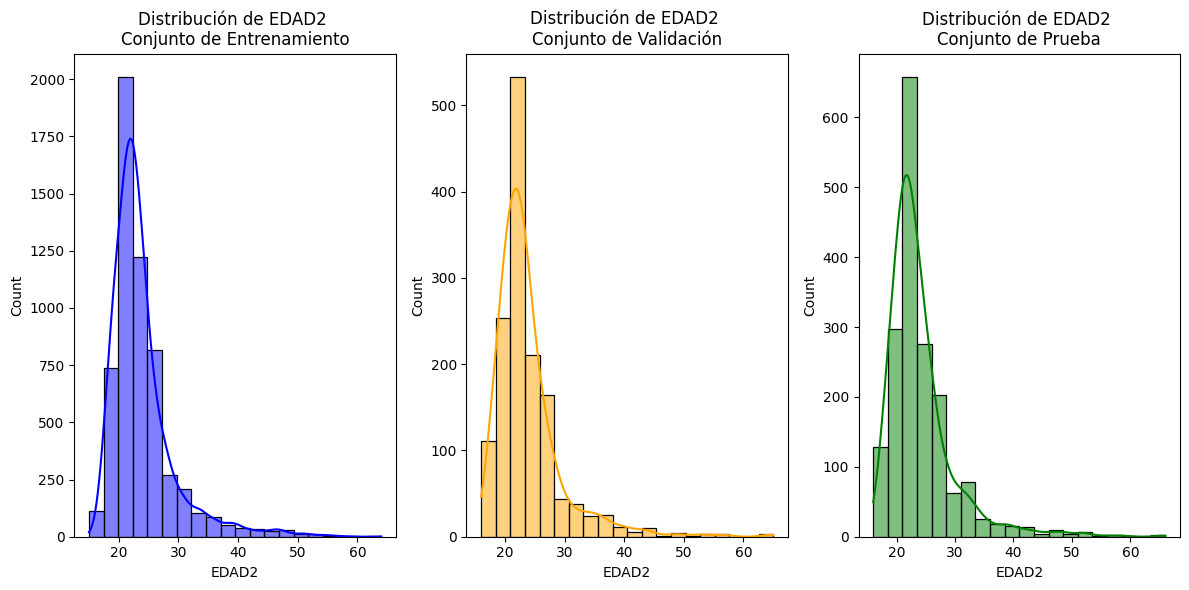

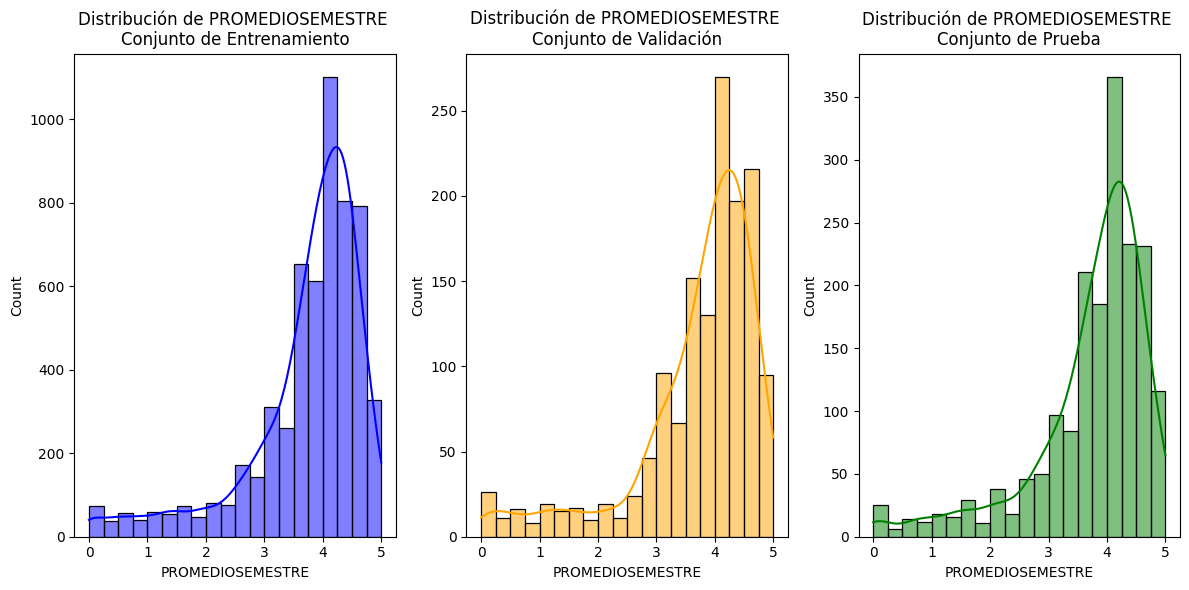

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la distribución de 'EDAD2' en los conjuntos de entrenamiento, validación y prueba
plt.figure(figsize=(12, 6))

# Graficar en el conjunto de entrenamiento
plt.subplot(1, 3, 1)
sns.histplot(X_train['EDAD2'], kde=True, color='blue', bins=20)
plt.title('Distribución de EDAD2 \nConjunto de Entrenamiento')

# Graficar en el conjunto de validación
plt.subplot(1, 3, 2)
sns.histplot(X_val['EDAD2'], kde=True, color='orange', bins=20)
plt.title('Distribución de EDAD2 \nConjunto de Validación')

# Graficar en el conjunto de prueba
plt.subplot(1, 3, 3)
sns.histplot(X_test['EDAD2'], kde=True, color='green', bins=20)
plt.title('Distribución de EDAD2 \nConjunto de Prueba')

plt.tight_layout()
plt.show()

# Graficar la distribución de 'PROMEDIOSEMESTRE' en los conjuntos de entrenamiento, validación y prueba
plt.figure(figsize=(12, 6))

# Graficar en el conjunto de entrenamiento
plt.subplot(1, 3, 1)
sns.histplot(X_train['PROMEDIOSEMESTRE'], kde=True, color='blue', bins=20)
plt.title('Distribución de PROMEDIOSEMESTRE \nConjunto de Entrenamiento')

# Graficar en el conjunto de validación
plt.subplot(1, 3, 2)
sns.histplot(X_val['PROMEDIOSEMESTRE'], kde=True, color='orange', bins=20)
plt.title('Distribución de PROMEDIOSEMESTRE \nConjunto de Validación')

# Graficar en el conjunto de prueba
plt.subplot(1, 3, 3)
sns.histplot(X_test['PROMEDIOSEMESTRE'], kde=True, color='green', bins=20)
plt.title('Distribución de PROMEDIOSEMESTRE \nConjunto de Prueba')

plt.tight_layout()
plt.show()



In [13]:
# Función para eliminar outliers según el criterio del rango intercuartílico (IQR)
def remove_outliers(df, cols):
    df_cleaned = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)  # Primer cuartil
        Q3 = df[col].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR  # Límite inferior
        upper_bound = Q3 + 1.5 * IQR  # Límite superior
        # Filtrar valores fuera del rango IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# Crear un DataFrame sin outliers
numeric_cols = data.select_dtypes(include=['float', 'int']).columns  # Seleccionar columnas numéricas
data_no_outliers = remove_outliers(data, numeric_cols)

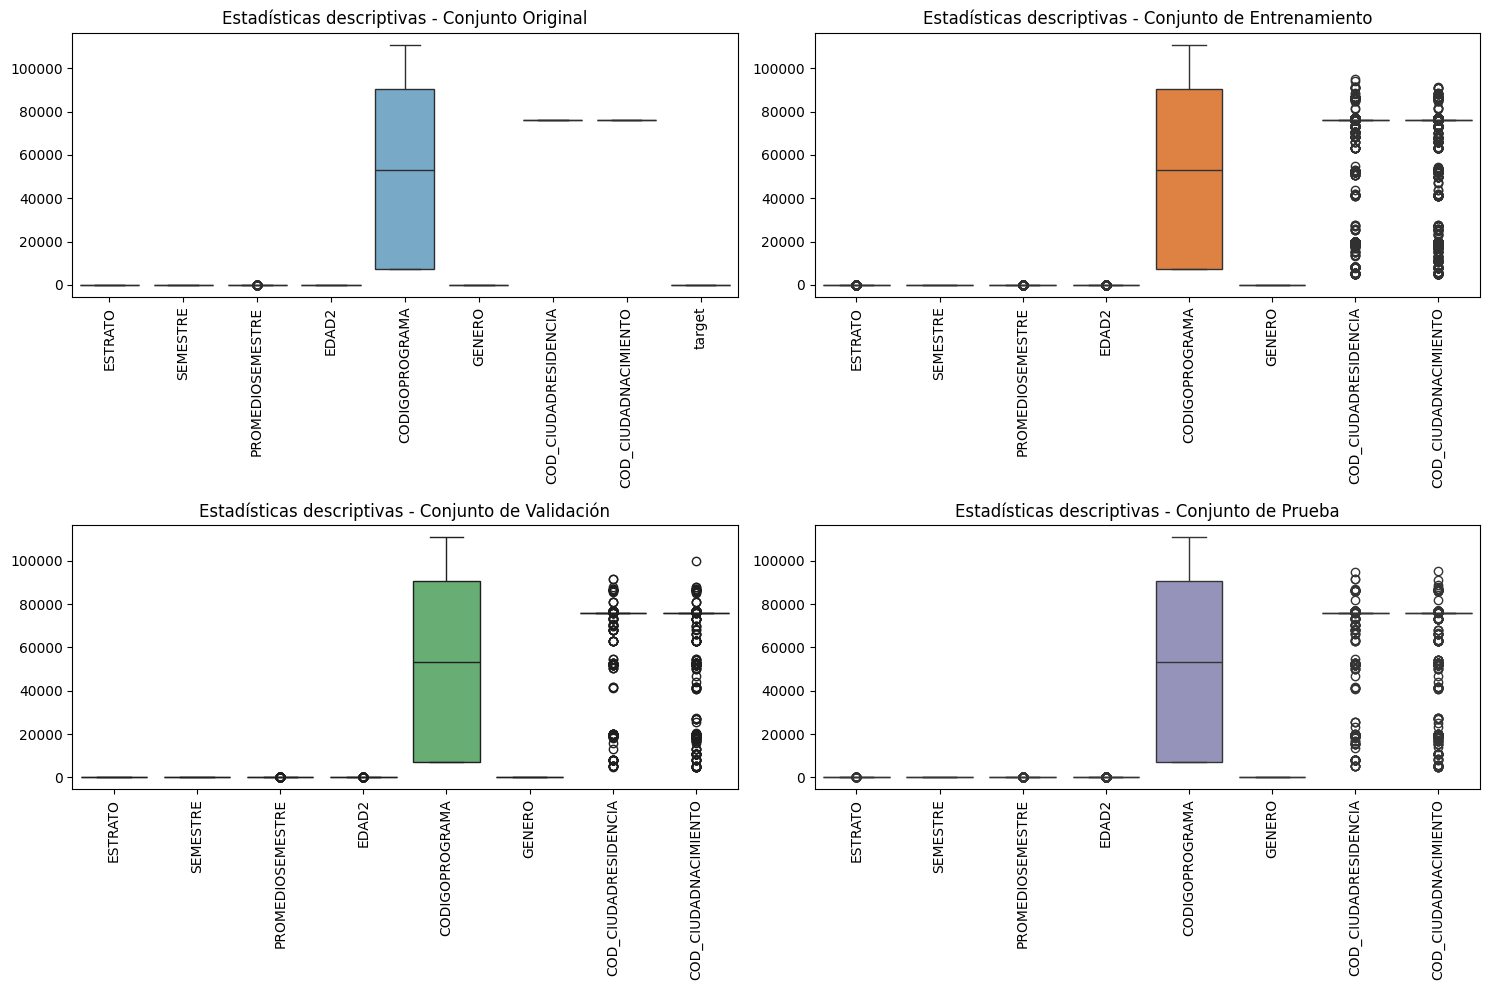

In [16]:
# Establecer un tamaño de figura general
plt.figure(figsize=(15, 10))

# Boxplot para el conjunto original
plt.subplot(2, 2, 1)
sns.boxplot(data=data_no_outliers, palette="Blues")
plt.title("Estadísticas descriptivas - Conjunto Original")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para mayor legibilidad

# Boxplot para el conjunto de entrenamiento
plt.subplot(2, 2, 2)
sns.boxplot(data=X_train, palette="Oranges")
plt.title("Estadísticas descriptivas - Conjunto de Entrenamiento")
plt.xticks(rotation=90)

# Boxplot para el conjunto de validación
plt.subplot(2, 2, 3)
sns.boxplot(data=X_val, palette="Greens")
plt.title("Estadísticas descriptivas - Conjunto de Validación")
plt.xticks(rotation=90)

# Boxplot para el conjunto de prueba
plt.subplot(2, 2, 4)
sns.boxplot(data=X_test, palette="Purples")
plt.title("Estadísticas descriptivas - Conjunto de Prueba")
plt.xticks(rotation=90)

# Ajustar el layout
plt.tight_layout()
plt.show()


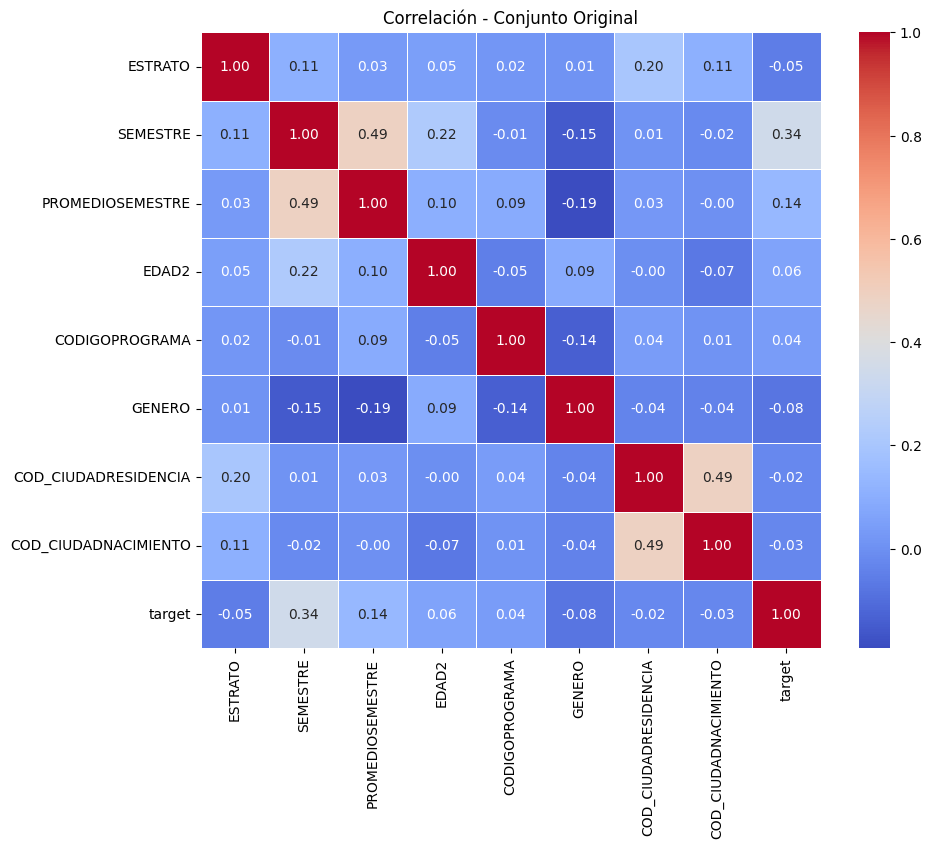

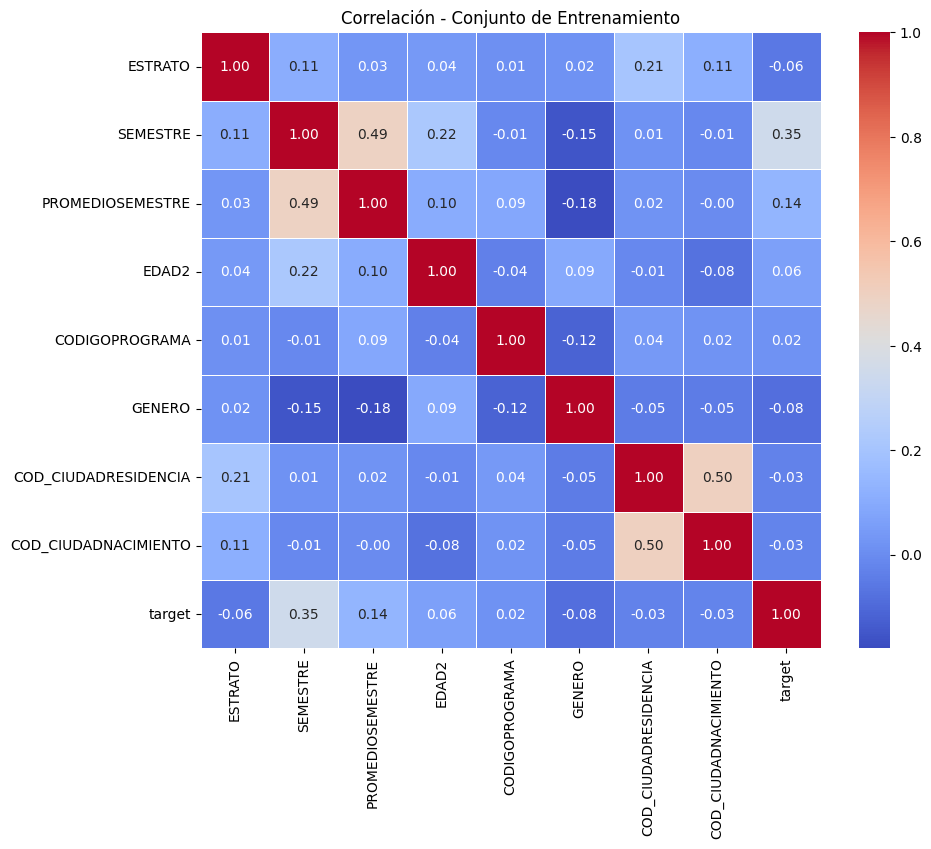

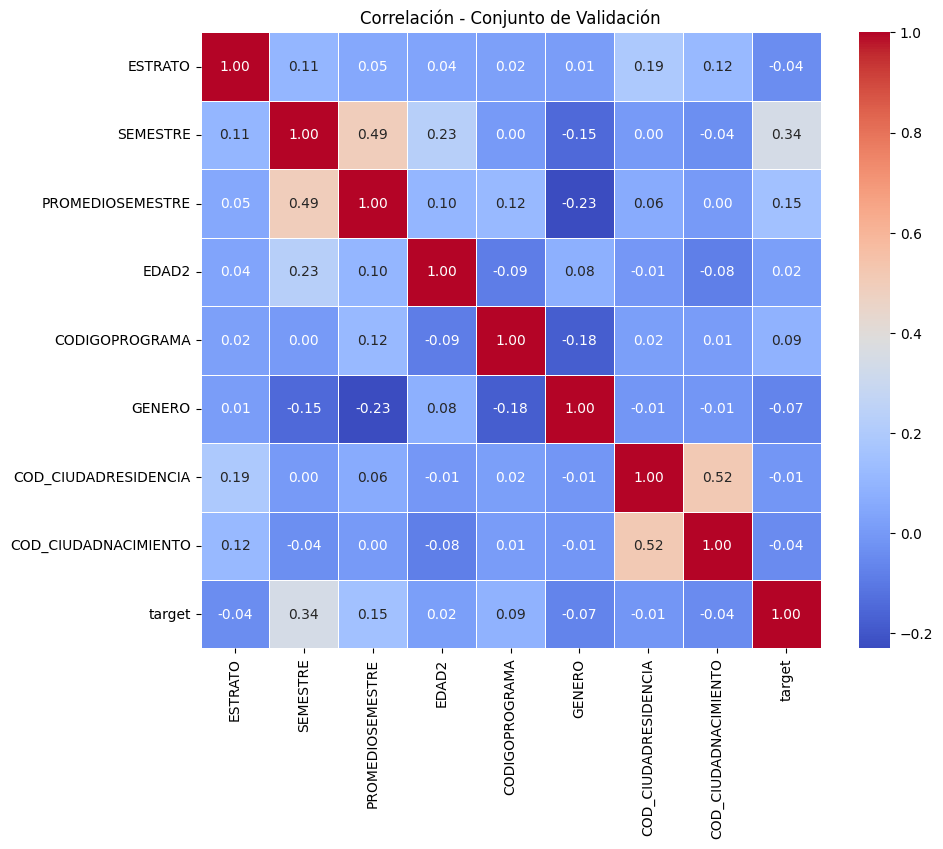

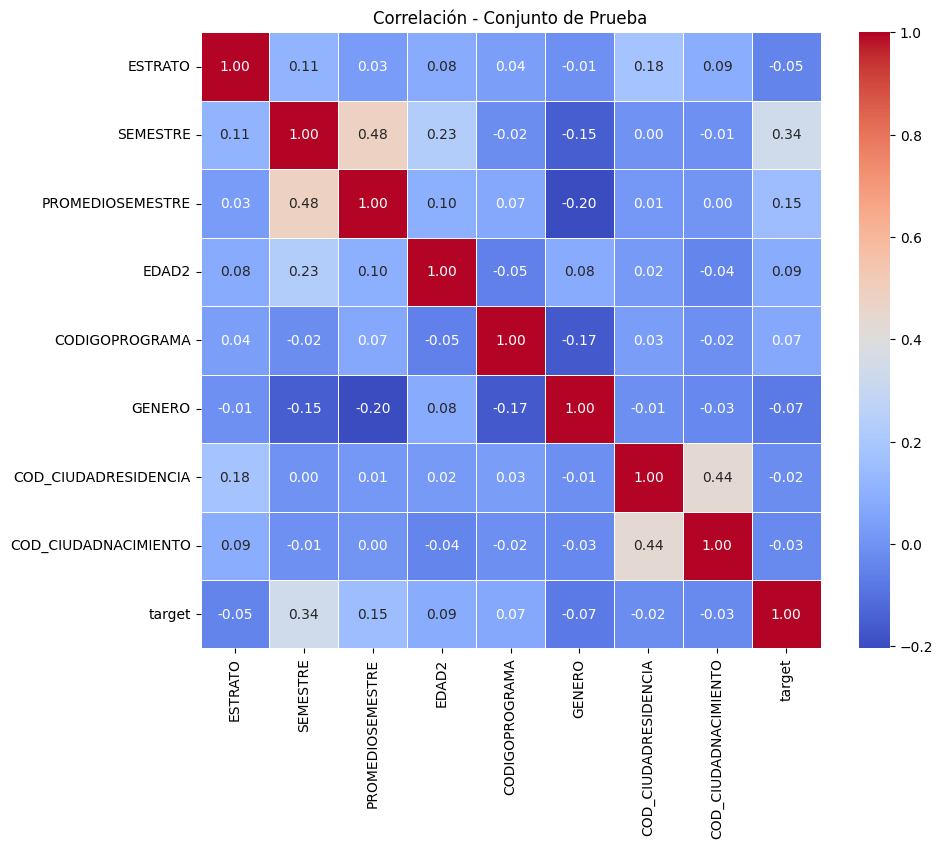

In [17]:
# Función para graficar la correlación
def plot_correlation_heatmap(data, title):
    plt.figure(figsize=(10, 8))
    corr_matrix = data.corr()  # Calcular la matriz de correlación
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

# Concatenar las variables de entrada (X) y salida (y) para cada conjunto
train_data = pd.concat([X_train, y_train], axis=1)  # Conjunto de entrenamiento
val_data = pd.concat([X_val, y_val], axis=1)        # Conjunto de validación
test_data = pd.concat([X_test, y_test], axis=1)     # Conjunto de prueba

# Graficar la correlación para el conjunto original
plot_correlation_heatmap(data, "Correlación - Conjunto Original")

# Graficar la correlación para el conjunto de entrenamiento
plot_correlation_heatmap(train_data, "Correlación - Conjunto de Entrenamiento")

# Graficar la correlación para el conjunto de validación
plot_correlation_heatmap(val_data, "Correlación - Conjunto de Validación")

# Graficar la correlación para el conjunto de prueba
plot_correlation_heatmap(test_data, "Correlación - Conjunto de Prueba")